In [1]:
from sympy import symbols, Eq, Matrix, Rational, solve, simplify, factor, init_printing
from sympy.functions import re, im, sqrt
from sympy.functions import conjugate as conj
init_printing()

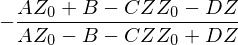

In [2]:
#Cascade z2zp
Z_0 = symbols("Z_0")
G = symbols("G")
Z = symbols("Z")
T_1_1, T_1_2, T_2_1, T_2_2  = symbols("T_1_1 T_1_2 T_2_1 T_2_2")
A, B, C, D  = symbols("A B C D")
G_p = (T_1_2 - T_2_2*G) / (T_2_1*G - T_1_1)
G_p = factor(G_p.subs(G, (Z - Z_0)/(Z + Z_0)))

#a2t
Matrix_1 = 1/(2*sqrt(2*re(Z_0)))*Matrix([[1, -1*conj(Z_0)],
                                       [1, Z_0]])
Matrix_2 = Matrix([[A, B],
                   [C, D]])
Matrix_3 = sqrt(2/re(Z_0))*Matrix([[conj(Z_0), Z_0],
                                 [1, -1]])
Flip_I = Matrix([[1,  0],
                 [0, -1]])
T = simplify(Matrix_1*Matrix_2*Flip_I*Matrix_3)
G_p = factor(G_p.subs(T_1_1, T[0,0]).subs(T_1_2, T[0,1]).subs(T_2_1, T[1,0]).subs(T_2_2, T[1,1])).subs(conj(Z_0), Z_0)
G_p = factor(G_p.subs(conj(Z_0), Z_0))
Z_p = Z_0*(1+G_p)/(1-G_p)
G_p

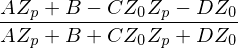

In [3]:
#Cascade zp2z
Z_0 = symbols("Z_0")
G_p = symbols("G_p")
Z_p = symbols("Z_p")
T_1_1, T_1_2, T_2_1, T_2_2  = symbols("T_1_1 T_1_2 T_2_1 T_2_2")
A, B, C, D  = symbols("A B C D")
G = (T_1_1*G_p + T_1_2) / (T_2_1*G_p + T_2_2)
G = factor(G.subs(G_p, (Z_p - Z_0)/(Z_p + Z_0)))

#a2t
Matrix_1 = 1/(2*sqrt(2*re(Z_0)))*Matrix([[1, -1*conj(Z_0)],
                                       [1, Z_0]])
Matrix_2 = Matrix([[A, B],
                   [C, D]])
Matrix_3 = sqrt(2/re(Z_0))*Matrix([[conj(Z_0), Z_0],
                                 [1, -1]])
Flip_I = Matrix([[1,  0],
                 [0, -1]])
T = simplify(Matrix_1*Matrix_2*Flip_I*Matrix_3)
G = factor(G.subs(T_1_1, T[0,0]).subs(T_1_2, T[0,1]).subs(T_2_1, T[1,0]).subs(T_2_2, T[1,1])).subs(conj(Z_0), Z_0)
G = factor(G.subs(conj(Z_0), Z_0))
Z = Z_0*(1+G)/(1-G)
G

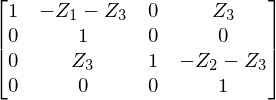

In [4]:
#Tee
Z_1, Z_2, Z_3 = symbols("Z_1 Z_2 Z_3")
Matrix_1 = Matrix([[1, -Z_3, 0, Z_3],
                   [0, 1,    0,    0],
                   [0, Z_3, 1, -Z_3],
                   [0, 0,   0,    1]])
Matrix_2 = Matrix([[1, -Z_1, 0,    0],
                   [0, 1,    0,    0],
                   [0, 0,    1, -Z_2],
                   [0, 0,    0,    1]])
ABCD = Matrix_1*Matrix_2
ABCD
# [ABCD[0, 3] - ABCD[0, 1], ABCD[2, 1] - ABCD[2, 3]]

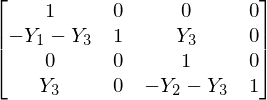

In [5]:
#Pi
Y_1, Y_2, Y_3 = symbols("Y_1 Y_2 Y_3")
Matrix_1 = Matrix([[1,    0, 0,    0],
                   [-Y_3, 1, Y_3,  0],
                   [0,    0, 1,    0],
                   [Y_3,  0, -Y_3, 1]])
Matrix_2 = Matrix([[1,    0, 0,    0],
                   [-Y_1, 1, 0,    0],
                   [0,    0, 1,    0],
                   [0,    0, -Y_2, 1]])
ABCD = Matrix_1*Matrix_2
ABCD
# [-ABCD[1, 0] - ABCD[3, 0], -ABCD[1, 2] - ABCD[3, 2]]